In [122]:
import pandas as pd
import numpy as np

feature_name_df = pd.read_csv('adult.csv', sep = ',',names = ["age","workclass","fnlwgt","education","education-num",
                                                               "marital-statue","occupation","relationship","race","sex",
                                                               "capital-gain","capital-loss","hours-per-week","native-country","income"])
# feature_name_df.to_csv('adult.csv', mode = 'w',index = False)

                            

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series, DataFrame

adult_df = pd.read_csv('adult.csv')
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-statue,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [138]:
def drop_features(df):
    df.drop(['workclass','fnlwgt','education','marital-statue',''],axis=1,inplace=True)
    return df

def transform_features(df):
    df = drop_features(df)
    return df


In [139]:
r1 = adult_df['occupation'].replace("?","etc", inplace=True)
r2 = adult_df['native-country'].replace("?","etc", inplace=True)

In [140]:
adult_df['native-country'] = adult_df['native-country'].str[0:1]
adult_df['native-country']



In [141]:
print(adult_df['income'].value_counts())

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


In [142]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['sex','native-country','income','relationship','race']
    for feature in features:
        le = preprocessing.LabelEncoder()   
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

adult_df = encode_features(adult_df)
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-statue,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,1,4,1,2174,0,40,39,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,0,4,1,0,0,13,39,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,1,4,1,0,0,40,39,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,0,2,1,0,0,40,39,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,5,2,0,0,0,40,5,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,5,4,0,0,0,40,39,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,1,2,0,0,0,16,23,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,0,4,1,0,0,45,39,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,1,4,0,14084,0,50,39,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,0,4,1,5178,0,40,39,1


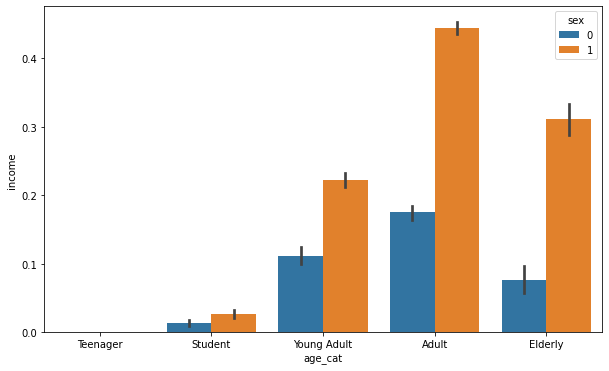

In [143]:
def get_category(age):
    cat = ''
    if age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['age_cat'] = adult_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat', y = 'income', hue='sex', data=adult_df, order=group_names)
adult_df.drop('age_cat', axis=1, inplace=True)

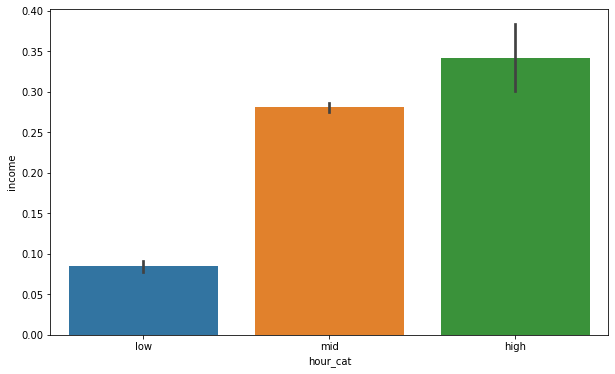

In [144]:
def hour_category(hours_per_week):
    cat = ''
    if hours_per_week<=35: cat = 'low'
    elif hours_per_week<= 70: cat = 'mid'
    else : cat= 'high'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['low','mid','high']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['hour_cat'] = adult_df['hours-per-week'].apply(lambda x : hour_category(x))
sns.barplot(x='hour_cat', y = 'income', data=adult_df, order=group_names)
adult_df.drop('hour_cat', axis=1, inplace=True)

In [147]:
adult_df = pd.read_csv('adult.csv')
y_adult_df = adult_df['income']
X_adult_df= adult_df.drop('income',axis=1)

X_adult_df = transform_features(X_adult_df)

KeyError: "[''] not found in axis"

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = adult_df.iloc[:, :-1]
y = adult_df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_adult_df, y_adult_df, \
                                                  test_size=0.2)